# MOVIE RATING PREDICTION
    A.Exploratory Data Analysis(EDA)
       1.Loadaing the data 
       2.Data Undrestanding 
       3.Data Cleaning 
       4.Univariate Analysis 
       5.Bivariate Analysis
       6.Multivariate Analysis 
    B.ML Model 
       7.Model Creation 
       8.Model Evaluation aluation


#### importing libraries 

In [48]:
#for preprocessing 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#for prediction 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
import category_encoders as ce
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

# A.Exploraly Data Analysis(EDA) ---

## 1.Loadaing the data lysis

In [2]:
import chardet

with open('IMDb Movies India.csv', 'rb') as f: ## to Specify the correct encoding
    result = chardet.detect(f.read())
charenc = result['encoding']
print(charenc)

data = pd.read_csv('IMDb Movies India.csv' , encoding=charenc )

data.head()

ISO-8859-1


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## 2.Data Undrestanding 


In [3]:
data.shape

(15509, 10)

In [4]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


## 3.Data Cleaning 


##### Dropping columns than not affect on the target ----



In [6]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [60]:
data =data.drop(columns=["Name"],axis=1, errors='ignore') 

data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,(2019),109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,(2019),110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,(1997),147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,(2005),142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,(2012),82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


##### Dropping Nulls 

In [8]:
data.isna().sum()


Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
data= data.dropna(subset=["Year","Genre","Director","Actor 1","Actor 2","Actor 3","Rating"])

In [10]:
data = data.dropna().reset_index(drop=True)


In [11]:
data.isna().sum()


Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

#### Changing duration and votes to numeric 


In [28]:
data["Duration"] = data.loc[:,"Duration"].str.replace(" min","")
data["Duration"] = pd.to_numeric(data.loc[:,"Duration"])

data["Votes"] = data.loc[:,"Votes"].str.replace(",","")
data["Votes"] = pd.to_numeric(data.loc[:,"Votes"])

In [29]:
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,(2019),109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,(2019),110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,(1997),147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,(2005),142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,(2012),82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


## 4.Univariate Analysis 


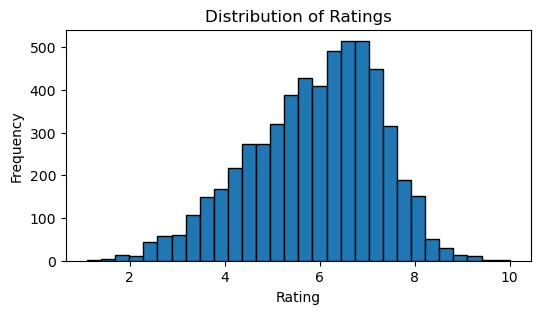

In [13]:
# Distribution of Ratings
plt.figure(figsize=(6, 3))
plt.hist(data['Rating'], bins=30, edgecolor='k')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()




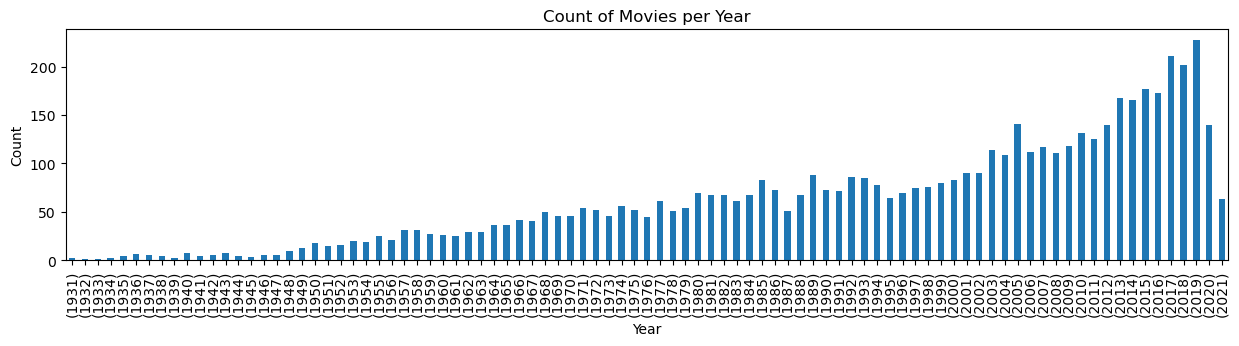

In [18]:
# Count of Movies per Year
plt.figure(figsize=(15, 3))
data['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Count of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## 5.Bivariate Analysis


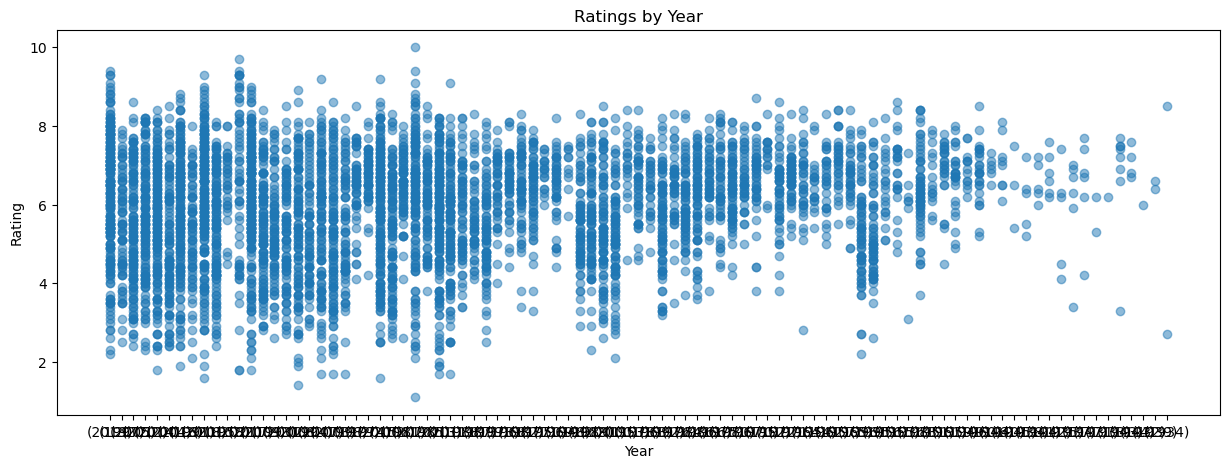

In [21]:
# Ratings by Year
plt.figure(figsize=(15, 5))
plt.scatter(data['Year'], data['Rating'], alpha=0.5)
plt.title('Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()




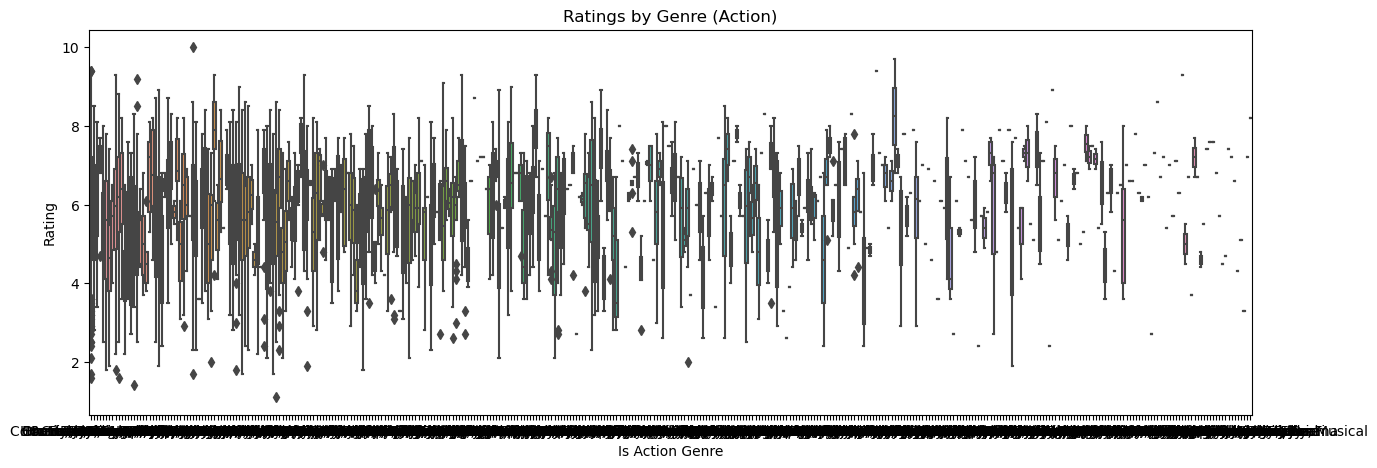

In [23]:
# Box plot of Ratings by Genre (example for Action genre)
plt.figure(figsize=(15, 5))
sns.boxplot(x='Genre', y='Rating', data=data)
plt.title('Ratings by Genre (Action)')
plt.xlabel('Is Action Genre')
plt.ylabel('Rating')
plt.show()

## 6.Multivariate Analysis

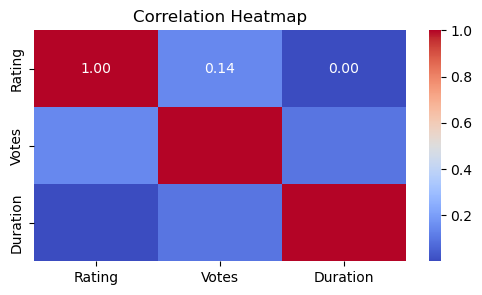

In [31]:
# Select numeric columns for correlation matrix
numeric_cols = ['Rating', 'Votes', 'Duration']

# Heatmap of correlations
plt.figure(figsize=(6, 3))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# B.ML Model --- 

## 7.Model Creation 

#### Encoding 

In [33]:
data.columns 

Index(['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3'],
      dtype='object')

In [34]:
x = data.drop(columns="Rating")
y = data[["Rating"]]

In [35]:
import category_encoders as ce
encoder = ce.JamesSteinEncoder(return_df=True)
encoder.fit(x,y)
x = encoder.transform(x.loc[:,:])

In [36]:
x

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,6.067038,109,6.190458,8,7.000000,6.828095,7.000000,7.000000
1,6.067038,110,5.801780,35,4.400000,5.600479,4.400000,4.453784
2,5.661811,147,6.089309,827,5.592601,5.243878,5.845137,5.884803
3,5.671316,142,6.413996,1086,7.180758,5.656607,6.710754,6.209901
4,5.777492,82,5.711144,326,5.600000,5.600000,5.892436,5.600000
...,...,...,...,...,...,...,...,...
5654,5.856115,115,6.190458,408,6.100000,6.359431,6.100000,5.852982
5655,5.667280,153,6.624319,1496,6.977776,5.245275,5.848443,5.933464
5656,5.765476,125,5.814069,44,6.207432,6.214408,5.800000,6.019827
5657,5.596410,129,5.683573,655,5.375153,5.677686,4.908624,5.808669


#### Normalization 

In [38]:
scaler = RobustScaler()
scaler.fit(x)
x.loc[:,:] = scaler.transform(x.loc[:,:]) 

In [39]:
x

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.388891,-0.838710,0.598502,-0.137815,0.994956,1.049242,1.161408,1.236829
1,0.388891,-0.806452,-0.190937,-0.107563,-1.516693,-0.381865,-1.695800,-1.715941
2,-0.358248,0.387097,0.393060,0.779832,-0.364618,-0.797576,-0.107701,-0.056431
3,-0.340722,0.225806,1.052526,1.070028,1.169572,-0.316434,0.843549,0.320576
4,-0.144960,-1.709677,-0.375026,0.218487,-0.357471,-0.382423,-0.055723,-0.386708
...,...,...,...,...,...,...,...,...
5654,0.000000,-0.645161,0.598502,0.310364,0.125539,0.502892,0.172375,-0.093332
5655,-0.348163,0.580645,1.479711,1.529412,0.973487,-0.795948,-0.104068,0.000000
5656,-0.167115,-0.322581,-0.165977,-0.097479,0.229320,0.333830,-0.157303,0.100153
5657,-0.478831,-0.193548,-0.431024,0.587115,-0.574677,-0.291860,-1.136860,-0.144721


#### Training 

In [40]:
## devide data into train and test 
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [41]:
x_test.shape

(1132, 8)

In [42]:
x_train.shape 

(4527, 8)

In [49]:
model = XGBRegressor(objective ='reg:squarederror',gamma=0.09,learning_rate=0.08,subsample=0.7)
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.09, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## 8.Model Evaluation 

In [50]:
y_pred=model.predict(x_test)


In [51]:
y_pred 

array([5.404621 , 2.0674582, 4.5936337, ..., 4.9381223, 6.3745227,
       6.69856  ], dtype=float32)

In [55]:
model.score(x_train,y_train)


0.9253159411763612

In [59]:
model.score(x_test,y_test)


0.8379443272697842